In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [16]:
letters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
company_symbol = [''.join(np.random.choice(letters,5)) for i in range(20)]

In [17]:
df = pd.DataFrame({
    'contract no':np.random.randint(111111,999999,(10000)),
    'stock_symbol':np.random.choice(company_symbol,10000),
    'buyer_broker':np.random.randint(1,20,10000),
    'seller_broker':np.random.randint(1,20,10000),
    'quantity':np.random.randint(50,1000,10000),
    'rate':np.random.randint(100,10000,10000),
    'date':[f"20{k}-{i}-{j}" for k in range(10,50) for i in range(1,11) for j in range(1,29)][:10000]
}).reset_index().rename(columns={'index':'sn'})

In [18]:
df["amount"] = df["quantity"]* df["rate"]
df['date']=pd.to_datetime(df['date'])

In [19]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,490562,LBMGW,5,1,256,9604,2010-01-01,2458624
1,1,508376,TKLQR,4,10,715,7458,2010-01-02,5332470
2,2,697364,IYWEW,16,12,734,2189,2010-01-03,1606726
3,3,523152,NFTFV,4,10,199,5075,2010-01-04,1009925
4,4,954652,ILADN,6,16,879,4339,2010-01-05,3813981


In [20]:
df.tail()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
9995,9995,201659,CKSVG,9,7,343,6301,2045-07-28,2161243
9996,9996,302225,LBMGW,15,10,690,8067,2045-08-01,5566230
9997,9997,549271,KDHWJ,9,18,628,2357,2045-08-02,1480196
9998,9998,241762,UAIGG,17,4,828,3773,2045-08-03,3124044
9999,9999,357525,HCXSX,16,8,847,1388,2045-08-04,1175636


# Single Broker Details

In [21]:
df[df['buyer_broker']==1].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
51,51,771765,UWBXW,1,2,635,9872,2010-02-24,6268720
56,56,191338,EYPRO,1,11,999,4870,2010-03-01,4865130
85,85,864721,BFBRP,1,17,637,3169,2010-04-02,2018653
89,89,763902,EYPRO,1,2,920,6148,2010-04-06,5656160
106,106,315337,BPGHX,1,19,407,4175,2010-04-23,1699225
158,158,672825,KDHWJ,1,19,110,7092,2010-06-19,780120
173,173,802357,IYWEW,1,16,200,2066,2010-07-06,413200
194,194,125638,UWBXW,1,4,644,2981,2010-07-27,1919764
226,226,444130,BCDIB,1,4,859,3554,2010-09-03,3052886
232,232,587030,UAIGG,1,8,137,5392,2010-09-09,738704


In [22]:
df[df['buyer_broker']==2].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
32,32,697172,ILADN,2,10,188,3536,2010-02-05,664768
44,44,919562,HCXSX,2,2,404,808,2010-02-17,326432
76,76,930769,ILADN,2,6,339,3039,2010-03-21,1030221
103,103,738614,HCXSX,2,5,652,2647,2010-04-20,1725844
172,172,826330,BPGHX,2,2,475,6530,2010-07-05,3101750
210,210,701235,ILADN,2,15,610,4180,2010-08-15,2549800
219,219,527090,KHVJP,2,6,157,8371,2010-08-24,1314247
252,252,763734,MRRJP,2,4,748,9819,2010-10-01,7344612
253,253,276661,LBMGW,2,5,728,423,2010-10-02,307944
292,292,676552,BPGHX,2,10,270,9397,2011-01-13,2537190


# data between date ranges

In [23]:
year_range = df[(df['date']>'2010-01-04')&(df['date']<'2011-01-04')]
year_range.head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
4,4,954652,ILADN,6,16,879,4339,2010-01-05,3813981
5,5,763390,KHVJP,9,7,221,3815,2010-01-06,843115
6,6,231631,BCDIB,6,2,135,8349,2010-01-07,1127115
7,7,535497,IYWEW,17,4,113,5474,2010-01-08,618562
8,8,358982,BCDIB,12,15,549,7704,2010-01-09,4229496
9,9,416481,FNGJH,5,17,763,5389,2010-01-10,4111807
10,10,614869,BFBRP,3,4,919,1802,2010-01-11,1656038
11,11,328327,KHVJP,10,19,63,7648,2010-01-12,481824
12,12,203639,UAIGG,17,5,86,7236,2010-01-13,622296
13,13,201599,HCXSX,8,14,253,7197,2010-01-14,1820841


In [24]:
year_range.groupby(["buyer_broker"])["quantity"].sum().sort_values(ascending= False)

buyer_broker
18    9899
12    9445
5     8768
16    8609
6     8587
17    8093
19    7481
7     7082
13    7073
10    6881
9     6602
1     6161
11    6145
14    5943
8     5700
3     5496
15    5263
4     4889
2     4301
Name: quantity, dtype: int32

### Broker 17 was max stock buyer

In [25]:
year_range.groupby(["seller_broker"])["quantity"].sum().sort_values(ascending= False)

seller_broker
17    10329
10     9870
15     9127
19     8765
4      7945
2      7843
7      7805
8      7420
13     7284
16     7008
14     6901
3      6750
5      6196
9      6067
12     5852
6      5535
18     4374
11     3978
1      3369
Name: quantity, dtype: int32

### broker 5 was most stock seller

# Top buyer broker

In [26]:
df.groupby(["buyer_broker"])["amount"].sum().sort_values(ascending= False)

buyer_broker
2     1489006037
15    1461259263
4     1454361343
19    1448950948
1     1415140159
12    1406573849
7     1401606516
5     1401586126
11    1396150200
16    1380228089
9     1379900758
14    1377855532
3     1377597184
6     1375360617
18    1372424304
8     1369990977
10    1347355354
17    1285331129
13    1259167188
Name: amount, dtype: int32

# top seller broker

In [27]:
df.groupby(["seller_broker"])["amount"].sum().sort_values(ascending= False)

seller_broker
8     1505208019
17    1484884202
1     1464610710
9     1462338807
16    1446176199
4     1438508353
2     1395085378
10    1392360998
12    1389390654
14    1380222787
18    1374433950
7     1367746862
6     1361904309
11    1358801542
15    1332564207
3     1322069252
19    1318190943
13    1305627948
5     1299720453
Name: amount, dtype: int32

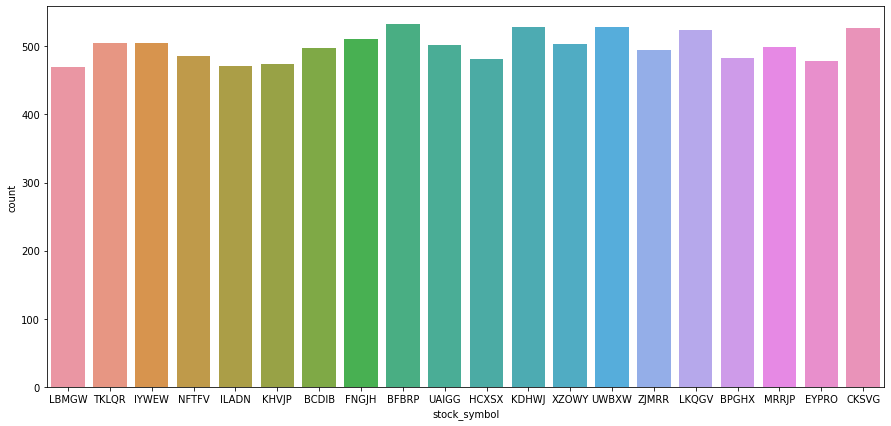

In [31]:
pl.figure(figsize=(15,7))
sns.countplot(x=df['stock_symbol'])
pl.show()

In [35]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,490562,LBMGW,5,1,256,9604,2010-01-01,2458624
1,1,508376,TKLQR,4,10,715,7458,2010-01-02,5332470
2,2,697364,IYWEW,16,12,734,2189,2010-01-03,1606726
3,3,523152,NFTFV,4,10,199,5075,2010-01-04,1009925
4,4,954652,ILADN,6,16,879,4339,2010-01-05,3813981


In [36]:
df.shape

(10000, 9)

In [37]:
df_buyer_= df[df['buyer_broker']>df['seller_broker']]
df_buyer_.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,490562,LBMGW,5,1,256,9604,2010-01-01,2458624
2,2,697364,IYWEW,16,12,734,2189,2010-01-03,1606726
5,5,763390,KHVJP,9,7,221,3815,2010-01-06,843115
6,6,231631,BCDIB,6,2,135,8349,2010-01-07,1127115
7,7,535497,IYWEW,17,4,113,5474,2010-01-08,618562


# Top turnover

In [38]:
df_buyer_.groupby(['stock_symbol'])['amount'].sum().sort_values(ascending=False)

stock_symbol
BFBRP    744587325
KDHWJ    702395904
FNGJH    674251075
UWBXW    670237565
LKQGV    642214965
KHVJP    640604303
XZOWY    624717344
NFTFV    610605494
MRRJP    609610785
CKSVG    609044663
EYPRO    604027823
BPGHX    590206262
BCDIB    588087465
TKLQR    581853709
UAIGG    575997018
ILADN    571075933
HCXSX    563163372
ZJMRR    562108036
IYWEW    555956951
LBMGW    549829410
Name: amount, dtype: int32